In [2]:

#i didn't use stemmer but leaving in for future
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
# suppress warnings
import matplotlib.image as mpimg
warnings.filterwarnings ( 'ignore' )
%matplotlib inline
import os 
import nltk
import re
import time
import nltk.tag.stanford as st
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud



import datetime






In [3]:
# load listings data into a pandas df

#allDF = pd.read_csv ("trumpjuly27tweet.csv") #this is tweets from  inauguration through july 26 or so, 
allDF = pd.read_csv ("jan_24_2018_trump_tweets.csv") #this is tweets from  inauguration through july 26 or so, 


#see squlite and python code..

#below inserted data isnt the day i downloaded them(the 25th) so what is it?

In [4]:
allDF.columns


Index(['rowid', 'query', 'user_type', 'tweet_id', 'inserted_date', 'truncated',
       'language', 'possibly_sensitive', 'coordinates', 'retweeted_status',
       'withheld_in_countries', 'withheld_scope', 'created_at_text',
       'created_at', 'month', 'year', 'content', 'from_user_screen_name',
       'from_user_followers_count', 'from_user_friends_count',
       'from_user_listed_count', 'from_user_favourites_count',
       'from_user_statuses_count', 'from_user_description',
       'from_user_location', 'from_user_created_at', 'retweet_count',
       'favorite_count', 'entities_urls', 'entities_urls_count',
       'entities_hashtags', 'entities_hashtags_count', 'entities_mentions',
       'entities_mentions_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'source', 'entities_expanded_urls',
       'json_output', 'entities_media_count', 'media_expanded_url',
       'media_url', 'media_type', 'video_link', 'photo_link', 'twitpic',
       'num_characters', 'num_word

In [5]:
#cleaning up the dates for timestamp //change from str to a date, this could be improved

In [9]:
allDF.created_at_text[:-1]

0       Sun Feb 26 11:33:16 +0000 2017
1       Sat Feb 25 22:02:22 +0000 2017
2       Sat Feb 25 21:53:21 +0000 2017
3       Sat Feb 25 18:12:25 +0000 2017
4       Sat Feb 25 13:27:04 +0000 2017
5       Sat Feb 25 13:19:18 +0000 2017
6       Sat Feb 25 12:25:24 +0000 2017
7       Sat Feb 25 03:09:18 +0000 2017
8       Fri Feb 24 17:04:19 +0000 2017
9       Fri Feb 24 13:49:27 +0000 2017
10      Fri Feb 24 12:36:34 +0000 2017
11      Fri Feb 24 12:31:49 +0000 2017
12      Fri Feb 24 00:06:44 +0000 2017
13      Fri Feb 24 00:01:40 +0000 2017
14      Thu Feb 23 22:53:45 +0000 2017
15      Wed Feb 22 12:50:56 +0000 2017
16      Wed Feb 22 12:20:40 +0000 2017
17      Tue Feb 21 23:23:13 +0000 2017
18      Tue Feb 21 20:46:42 +0000 2017
19      Tue Feb 21 00:38:40 +0000 2017
20      Mon Feb 20 21:00:37 +0000 2017
21      Mon Feb 20 14:33:33 +0000 2017
22      Mon Feb 20 14:15:42 +0000 2017
23      Sun Feb 19 21:57:01 +0000 2017
24      Sat Feb 18 13:51:20 +0000 2017
25      Sat Feb 18 13:31:

In [10]:
import datetime

In [11]:
date_str = allDF['created_at_text'][0] #

print (date_str, type(date_str))

In [12]:
#EDITED FROM STACKOVERFLOW CONVERT TO DATETIME AND FORMAT

In [13]:
#would be nice to bring back minutes and seconds later

from datetime import datetime
import re

unformatted = date_str

# Use re to get rid of the milliseconds.
remove_ms = lambda x:re.sub("\+\d+\s","",x)

remove_ms(unformatted)

# Make the string into a datetime object.
mk_dt = lambda x:datetime.strptime(remove_ms(x), "%a %b %d %H:%M:%S %Y")

# Format your datetime object.
my_form = lambda x:"{:%Y-%m-%d %H:%M:%S}".format(mk_dt(x))

my_form(unformatted)




'2017-02-26 11:33:16'

In [14]:
timestamps = allDF.created_at_text.apply(my_form)
type(timestamps[4]) #this doesnt succeed at changing type from string to timestamp..
#but does format it so it fits in forumla to  do that later...should look at more closely

str

datetime.datetime.strptime(date_str,"%Y-%m-%d %H:%M:%S")

#my solution
timestamps1 = []
for date in allDF.inserted_date:
    new_date = datetime.datetime.strptime(date_str[:-7],"%Y-%m-%d %H:%M:%S")
    timestamps1.append(new_date)

In [15]:
allDF["timestamp"] = pd.Series(timestamps, index = allDF.index)  
allDF["timestamp"][0]
type(allDF.timestamp[0])

str

In [16]:
import datetime
#his solution -- still need to 
timestamps = [] #set up list
for k in range(len(allDF)): #loop over every row in data set
    timestamps.append(datetime.datetime.strptime\
                      (allDF.timestamp.iloc[k],"%Y-%m-%d %H:%M:%S"))
    # (allDF.created_at.iloc[k][:-7],"%Y-%m-%d %H:%M:%S"))
#For every single row, I extract the date time,
#except I ignore the last 7 characters.

In [17]:
type(timestamps[0])

datetime.datetime

In [18]:
allDF["timestamp"] = pd.Series(timestamps, index = allDF.index)  
allDF["timestamp"][0]
type(allDF.timestamp[0])

pandas.tslib.Timestamp

newDF = allDF[["timestamp","tweet_id"]].copy()
#new = old[['A', 'C', 'D']].copy()

newDF.set_index('timestamp').groupby(pd.TimeGrouper('M')).mean().dropna()

newDF.groupby(newDF["timestamp"].dt.month).count().plot(kind="bar")

x = allDF["timestamp"]
#newdf = df[(df['column_one']>2004) & (df['column_two']==9)]

#make a histogram of date occurances by month..
x.groupby(x["timestamp"].dt.month).count().plot(kind="bar")
#df.groupby(df["date"].dt.month).count().plot(kind="bar")

allDF["timestamp"].count().plot(kind="bar")

I dont know where below tweets went..basically parts of april and may are missing!!
very frustrating..on his twitter feed there are clearly tweets

In [21]:


#what is earliest time stamp?
#test = allDF[(allDF['timestamp'] > '2017-04-20') & (allDF['timestamp'] < '2017-05-22')]
test = allDF[(allDF['timestamp'] > '2017-08-20')] # & (allDF['timestamp'] < '2017-05-22')]
#allDF.timestamp
test
#this shows a bit of weirdness -- im going to get rid of retweets but there
#might be times potus retweets realDonald but the realDonald isnt in here..? based
#on skimming sql like there are alot of potus realD retweets in may but no donald original tweet

# was his first tweet on election day really at 8pm? check the twitter feed...
# should spot check these to see if all are really downloaded...
#min and max below show the range of theses is nov 2016 to july 24

,rowid,query,user_type,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,timestamp
1579,1580,realDonaldTrump,1,946728546633953285,2018-01-24 21:19:25.571933,1,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 13:04:09
1580,1581,realDonaldTrump,1,946725057384108033,2018-01-24 21:19:25.590898,0,en,NaN,NaN,THIS IS A RETWEET,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 12:50:17
1581,1582,realDonaldTrump,1,946724984218669056,2018-01-24 21:19:25.598216,0,en,NaN,NaN,THIS IS A RETWEET,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 12:50:00
1582,1583,realDonaldTrump,1,946724719956578304,2018-01-24 21:19:25.603471,0,en,NaN,NaN,THIS IS A RETWEET,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 12:48:57
1583,1584,realDonaldTrump,1,946724543774765056,2018-01-24 21:19:25.615973,0,en,NaN,NaN,THIS IS A RETWEET,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 12:48:15
1584,1585,realDonaldTrump,1,946724075157651457,2018-01-24 21:19:25.619995,1,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 12:46:23
1585,1586,realDonaldTrump,1,946531657229701120,2018-01-24 21:19:25.625751,1,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-29 00:01:47
1586,1587,realDonaldTrump,1,946519720450252800,2018-01-24 21:19:25.630247,0,en,0.0,NaN,NaN,...,1.0,https://twitter.com/realDonaldTrump/status/946...,http://pbs.twimg.com/media/DSK2pluVAAAcN6N.jpg,photo,0,1,0,NaN,NaN,2017-12-28 23:14:21
1587,1588,realDonaldTrump,1,946505517417095168,2018-01-24 21:19:25.634501,0,en,0.0,NaN,THIS IS A RETWEET,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2017-12-28 22:17:55
1588,1589,realDonaldTrump,1,946505439939911685,2018-01-24 21:19:25.639023,0,en,0.0,NaN,THIS IS A RETWEET,...,1.0,https://twitter.com/DanScavino/status/94622083...,http://pbs.twimg.com/media/DSGm1I4UEAAXHtZ.jpg,photo,0,0,0,NaN,NaN,2017-12-28 22:17:36


In [16]:
#could do his favorite emojies ...ie flag in early tweet 

In [22]:
# might be fun to look at the longest and shortest times between tweets!
print(allDF.timestamp[4]-allDF.timestamp[3])


-1 days +19:14:39


# might be fun to look at the longest and shortest times between tweets!
* do a histogram of the times he tweets
* average tweets per day, average time between tweets -- see bird migration

In [23]:
times = allDF.timestamp
times.head()

0   2017-02-26 11:33:16
1   2017-02-25 22:02:22
2   2017-02-25 21:53:21
3   2017-02-25 18:12:25
4   2017-02-25 13:27:04
Name: timestamp, dtype: datetime64[ns]

In [24]:
#brackets make it work -- time btween first time and other times
elapsed_time = [time - times[0] for time in times]
elapsed_time[498] #fun!
 #seems like the rate of tweetin gslowed...


Timedelta('-88 days +00:06:29')

In [25]:
max(allDF.timestamp)

Timestamp('2018-01-21 02:31:07')

In [26]:
min(allDF.timestamp)

Timestamp('2016-11-08 00:16:15')

In [27]:
x = allDF.iloc[:, -1]  #all rows, last column ie timestamp
max(x)

Timestamp('2018-01-21 02:31:07')

(array([ -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,
         1750.,  2000.,  2250.]), <a list of 11 Text xticklabel objects>)

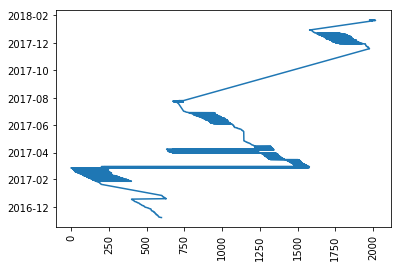

In [28]:
allDF = allDF.sort_values('timestamp', ascending=True)
plt.plot(allDF['timestamp'])
plt.xticks(rotation='vertical')

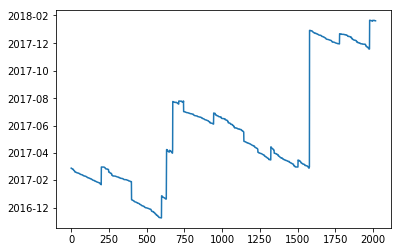

In [29]:
plt.plot(x)
plt.show() #too dumb to work with this today, return later..

In [30]:
#copy the sets to not accidentally change them
A = allDF[:]

print(A.head(5))

#get rid of retweets, ie leave in null retweets, then drop that column

newDF = A[A["retweeted_status"].isnull()] #.dropna(axis=1)

#what is this amp thing? that comes up in common words? can't find it though
#newDF.loc[newDF['content'].isin("amp")]
#newDF['content'].where(newDF['content'] == "&")

     rowid            query  user_type            tweet_id  \
598    599  realDonaldTrump          1  795781945607278592   
597    598  realDonaldTrump          1  795782371895349250   
596    597  realDonaldTrump          1  795834203430645760   
595    596  realDonaldTrump          1  795845126744604673   
594    595  realDonaldTrump          1  795845594032013312   

                  inserted_date  truncated language  possibly_sensitive  \
598  2017-04-13 16:24:08.615899          0       en                 0.0   
597  2017-04-13 16:24:08.609112          0       en                 NaN   
596  2017-04-13 16:24:08.605137          1       en                 0.0   
595  2017-04-13 16:24:08.598219          0       en                 0.0   
594  2017-04-13 16:24:08.594627          0       en                 0.0   

     coordinates   retweeted_status         ...          entities_media_count  \
598          NaN                NaN         ...                           NaN   
597          N

#get rid of retweets, ie leave in null retweets, then drop that column
allDF = allDF[allDF["retweeted_status"].isnull()].dropna(axis=1)

In [31]:
newDF.head()

,rowid,query,user_type,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,timestamp
598,599,realDonaldTrump,1,795781945607278592,2017-04-13 16:24:08.615899,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-11-08 00:16:15
597,598,realDonaldTrump,1,795782371895349250,2017-04-13 16:24:08.609112,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-11-08 00:17:57
596,597,realDonaldTrump,1,795834203430645760,2017-04-13 16:24:08.605137,1,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-11-08 03:43:54
593,594,realDonaldTrump,1,795879172795203584,2017-04-13 16:24:08.590964,1,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-11-08 06:42:36
592,593,realDonaldTrump,1,795954831718498305,2017-04-13 16:24:08.587298,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-11-08 11:43:14


times = newDF["created_at"]

len(allDF)

elapsed_time = [time - times[0] for time in times]
elapsed_time[len(allDF)] #fun!



elapsed_time[571]/datetime.timedelta(days=1)

plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.show()

allDF.sort_values(by='timestamp', ascending=0)[20:70]

In [32]:
newDF.groupby(['timestamp', 'tweet_id']).size().head()

timestamp            tweet_id          
2016-11-08 00:16:15  795781945607278592    1
2016-11-08 00:17:57  795782371895349250    1
2016-11-08 03:43:54  795834203430645760    1
2016-11-08 06:42:36  795879172795203584    1
2016-11-08 11:43:14  795954831718498305    1
dtype: int64

allDF.set_index('created_at').groupby(pd.TimeGrouper('M')).mean().dropna()

In [33]:

#get rid of text after hashtags
newDF['content'] = newDF['content'].str[0:-1].str.split('#', expand=True)[0]
#get rid of text of http etc 
newDF['content'] = newDF['content'].str[0:-1].str.split('http', expand=True)[0]
#get rid of punctuation ...
# replace all the numbers and non letter characters   with a space 
newDF['content'] = newDF['content'].str.replace("[^a-zA-Z]", " ")
# convert the text into lower
newDF['content'] = newDF['content'].str.lower()

#i didnt worry about stemming here but perhaps i should

newDF['content'].head(10)
#len(newDF['content'])


598    today in florida  i pledged to stand with the ...
597    big news to share in new hampshire tonight  po...
596    unbelievable evening in new hampshire   thank ...
593    today we are going to win the great state of m...
592                     today we make america great agai
591                                   vote today  go to 
590    we need your vote  go to the polls  let s cont...
589                                                     
588    i will be watching the election results from t...
587    just out according to  cnn   utah officials re...
Name: content, dtype: object

In [34]:
check = newDF[(newDF['timestamp'] > '2017-05-16 09:01:00') & (newDF['timestamp'] < '2017-05-20 09:00:00')]

In [35]:
check.content[0:5]

1143                         congratulations  uscgacademy
1142                              thank you  uscgacademy 
1139    getting ready for my big foreign trip  will be...
1138     u s  could get first paid family leave benefi...
1137                            weekly address   tune in 
Name: content, dtype: object

allDF[allDF['timestamp'] > '2017-04-20 09:01:00') & (allDF['timestamp'] < '2017-05-20 09:00:00')]

#amazing, kind of figured this out myself, is it good to have an array of arrays?

tokens = []
for row in allDF['content']:
    go = nltk.word_tokenize(row)
    tokens.append(go)
#(row for row in set(text1) if w.endswith('ableness'))



## tokenize all the content column, then divide it up into the
## units I want to make the images with, or be dumb and do it month by month..blerg


In [57]:
#month_1 = newDF[(newDF['timestamp'] > '2017-01-20 09:00:00') & (newDF['timestamp'] < '2017-02-20 09:00:00')]
#just shows the latest tweets i seem to have as of jan 25, which is like dec 28 or so? to jan late teens or so
month_1 = newDF[(newDF['timestamp'] > '2017-12-20 09:00:00')] # & (newDF['timestamp'] < '2017-02-20 09:00:00')]


#allDF.timestamp
#month_1
month_1['timestamp']

1636   2017-12-20 14:32:51
1635   2017-12-20 16:39:04
1634   2017-12-20 17:30:26
1633   2017-12-20 18:09:44
1632   2017-12-20 21:44:50
1631   2017-12-21 12:24:22
1630   2017-12-21 12:45:17
1629   2017-12-21 13:56:28
1628   2017-12-21 14:52:22
1627   2017-12-21 18:16:28
1626   2017-12-22 12:47:51
1625   2017-12-22 12:50:42
1624   2017-12-22 13:05:06
1623   2017-12-22 14:17:04
1622   2017-12-22 15:04:39
1621   2017-12-22 15:07:55
1620   2017-12-22 16:46:49
1619   2017-12-22 18:40:29
1618   2017-12-22 20:47:15
1617   2017-12-22 20:47:43
1616   2017-12-22 22:11:56
1614   2017-12-23 20:27:05
1613   2017-12-23 20:30:06
1612   2017-12-23 20:32:42
1611   2017-12-23 22:44:45
1610   2017-12-23 22:57:50
1609   2017-12-24 12:25:22
1607   2017-12-24 13:48:11
1606   2017-12-24 20:35:26
1605   2017-12-25 02:56:19
               ...        
1592   2017-12-28 16:24:08
1591   2017-12-28 19:20:47
1586   2017-12-28 23:14:21
1585   2017-12-29 00:01:47
1584   2017-12-29 12:46:23
1579   2017-12-29 13:04:09
1

In [39]:
#take out stopwords too
#can i filter out stopwords? this doesnt work
from nltk.corpus import stopwords
from nltk import FreqDist



custom =  ['amp','th']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_1 = []
for row in month_1['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_1.append(word)
#(row for row in set(text1) if w.endswith('ableness'))




In [40]:
len(tokens_month_1)

620

In [41]:
#month_2 = newDF[(newDF['timestamp'] > '2017-02-20 09:01:00') & (newDF['timestamp'] < '2017-03-20 09:00:00')]
#allDF.timestamp



In [35]:
# not using this
custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_2 = []
for row in month_2['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_2.append(word)
#(row for row in set(text1) if w.endswith('ableness'))





In [36]:
len(tokens_month_2)

2009

In [37]:
month_3 = newDF[(newDF['timestamp'] > '2017-03-20 09:01:00') & (newDF['timestamp'] < '2017-04-20 09:00:00')]



In [38]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_3 = []
for row in month_3['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_3.append(word)
#(row for row in set(text1) if w.endswith('ableness'))



print(len(tokens_month_3))

1798


tokens_month_3 = []
for row in month_3['content']:
    go = nltk.word_tokenize(row)
    tokens_month_3.append(go)
#(row for row in set(text1) if w.endswith('ableness'))




In [39]:
month_4 = newDF[(newDF['timestamp'] > '2017-04-20 09:01:00') & (newDF['timestamp'] < '2017-05-20 09:00:00')]



In [40]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_4 = []
for row in month_4['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_4.append(word)
#(row for row in set(text1) if w.endswith('ableness'))


#print(tokens_month_4)
print(len(tokens_month_4))

487


In [41]:
month_5 = newDF[(newDF['timestamp'] > '2017-05-20 09:01:00') & (newDF['timestamp'] < '2017-06-20 09:00:00')]




In [42]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_5 = []
for row in month_5['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_5.append(word)
#(row for row in set(text1) if w.endswith('ableness'))


#print(tokens_month_5)
print(len(tokens_month_5))

1055


In [43]:
month_6 = newDF[(newDF['timestamp'] > '2017-06-20 09:01:00') & (newDF['timestamp'] < '2017-07-20 09:00:00')]




In [44]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_6 = []
for row in month_6['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_6.append(word)
#(row for row in set(text1) if w.endswith('ableness'))


#print(tokens_month_6)

In [45]:
print(len(tokens_month_6))

999


In [46]:
month_7 = newDF[(newDF['timestamp'] > '2017-07-20 09:01:00') & (newDF['timestamp'] < '2017-07-24 19:07:43')]




In [ ]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_month_7 = []
for row in month_7['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word) != 1):
            tokens_month_7.append(word)
#(row for row in set(text1) if w.endswith('ableness'))


print(len(tokens_month_7))

In [48]:
max(newDF['timestamp'])

Timestamp('2017-07-25 19:07:42')

In [49]:
soFar = newDF[(newDF['timestamp'] > '2017-01-20 08:59:59')] #all greater than inaug

In [51]:

custom =  ['amp']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
tokens_soFar = []
for row in soFar['content']:
    go = nltk.word_tokenize(row)
    for word in go:
        if word not in stoppy and word not in custom and (len(word)>2): # 2 here to get rid of mysterious th in portrait
            tokens_soFar.append(word)
#(row for row in set(text1) if w.endswith('ableness'))


print(len(tokens_soFar))


9049


In [52]:
print(tokens_month_1[0])
#print(tokens_month_4[0])


americans


## make below into a function

def count_words(text): #using this from class on texts
    """count the number of times each word appears in text(str)
    return dictionary where keys are unique words and values are word counts"""
    text = text.lower()
    junk = [",",".",",",";",":",'"',"'"]
    for thing in junk:
        text = text.replace(thing, "") #not sure why later it refers to this and not earlier text?
        
    word_counts = {}
    for word in text.split(" "):
        #known word
        if word in word_counts:
            word_counts[word] +=1
        #unknown word
        else:
            word_counts[word] = 1
    return word_counts

count_words(text)
#count_words(tokens_month_1)
   

## the above gest rid of apostrophes too.. doesn't ie ...fixable? better way to do this?


tokens


In [53]:
#take out stopwords too
#can i filter out stopwords? this doesnt work
from nltk.corpus import stopwords
from nltk import FreqDist



custom =  ['amp','th']   #got rid of the weird word amp. not sure if that was some ampersand or ???
stoppy = set(stopwords.words('english'))
month1 = []

for group in tokens_month_1:
    for x in group:
        if x not in stoppy and x not in custom:
            month1.append(x)



print(month1[0], month2[0], month3[0], month4[0])



print(no_stop1[0], nostop2[0])

one = clean(tokens_month_1)


two = clean(tokens_month_2)
#three = clean(tokens_month_5)
#four = clean(tokens_month_4)
#five = clean(tokens_month_3)
#six = clean(tokens_month_2)
#seven = clean(tokens_month_1)

print(one[0:5],two[0:5])

print(tokens_month_1[0])

print(tokens_month_2[0])

In [54]:

    
    fdist1 = FreqDist(no_stop)

    fdist1.most_common(50) 
    most_common = []
    for word, frequency in fdist1.most_common(50):
        most_common.append((u'{};{}'.format(word, frequency)))
    
#if I want to use most frequent, I later have to split that..
    new = [i.split(';', 1)[0] for i in most_common]
#make a list for a bigger wordcloud later that has stoppwords
#new = [i.split(';', 1)[0] for i in no_stop]
    
    return(new)



IndentationError: unexpected indent (<ipython-input-54-43094cca1d49>, line 3)

from nltk import FreqDist
#trying to see frequency, amazingly, it works!!!
def frequency(text): # text haas been run through no stop, 
        fdist1 = FreqDist(text)

        fdist1.most_common(50) 
        most_common = []
        for word, frequency in fdist1.most_common(50):
            most_common.append((u'{};{}'.format(word, frequency)))
    
   # print(most_common)
#if I want to use most frequent, I later have to split that..
        new = [i.split(';', 1)[0] for i in most_common]
#make a list for a bigger wordcloud later that has stoppwords
#new = [i.split(';', 1)[0] for i in no_stop]
        return(new)

frequency(two)

### start below, run others through freqdist to then make the images

## so go back here and run the above with dates --
* from the start of the presidency
* by month
* from realdonald vs potus, or split them up? could just use @real donald.. or leave together ...
* shortest time between tweets since start of presidency,(thout he started writing those ... tweets)
* longest time between tweets 

In [55]:
#tokens_month_1
#month1_fdist = fdist1 #- freq dictionary
#month1_most_common = most_common #- ordered freq list
#month1_new = new #word list


#month2_fdist = fdist1 #- freq dictionary
#month2_most_common = most_common #- ordered freq list
#month2_new = new#word list


#month3_fdist = fdist1 #- freq dictionary
#month3_most_common = most_common #- ordered freq list
#month3_new = new#word list

#month4_fdist = fdist1 #- freq dictionary
#month4_most_common = most_common #- ordered freq list
#month4_new = new#word list
#month4_new


#month5_fdist = fdist1 #- freq dictionary
#month5_most_common = most_common #- ordered freq list
#month5_new = new#word list

#month6_fdist = fdist1 #- freq dictionary
#month6_most_common = most_common #- ordered freq list
#month6_new = new#word list

#month7_fdist = fdist1 #- freq dictionary
#month7_most_common = most_common #- ordered freq list
#month7_new = new#word list

from nltk import FreqDist
#trying to see frequency, amazingly, it works!!!
fdist1 = FreqDist(tokens_month_1)

dist = fdist1.most_common(100) 
most_common = []
for word, frequency in dist:
    most_common.append((u'{};{}'.format(word, frequency)))
    
#print(most_common) # this is most common word and number, could use for a list
#if I want to use most frequent, I later have to split that..
new = [i.split(';', 1)[0] for i in most_common] #this is for the word cloud
#make a list for a bigger wordcloud later that has stoppwords
#new = [i.split(';', 1)[0] for i in no_stop]


#soFar_fdist = fdist1 #- freq dictionary
#soFar_most_common = most_common #- ordered freq list
#soFar_new = new#word list
#soFar_most_common

#tokens_month_1
month1_fdist = fdist1 #- freq dictionary
month1_most_common = most_common #- ordered freq list
month1_new = new #word list

print(month1_new)

#print(soFar_new)

['great', 'tax', 'year', 'america', 'bill', 'fake', 'democrats', 'cut', 'record', 'military', 'news', 'country', 'fbi', 'cuts', 'would', 'making', 'people', 'many', 'big', 'reform', 'good', 'director', 'christmas', 'trump', 'working', 'like', 'together', 'make', 'house', 'want', 'security', 'individual', 'terminated', 'andrew', 'mccabe', 'proud', 'merry', 'government', 'done', 'historic', 'massive', 'foxandfriends', 'show', 'sales', 'hit', 'numbers', 'order', 'popular', 'thank', 'everyone', 'whitehouse', 'new', 'accomplished', 'things', 'past', 'administration', 'regulation', 'signing', 'ever', 'oval', 'office', 'less', 'far', 'dems', 'law', 'united', 'north', 'korea', 'today', 'full', 'remember', 'part', 'mandate', 'signed', 'deputy', 'charge', 'james', 'go', 'wow', 'stock', 'market', 'low', 'republicans', 'senate', 'foxnews', 'clinton', 'talk', 'strong', 'unpopular', 'saying', 'dossier', 'time', 'looking', 'day', 'last', 'th', 'long', 'could', 'rating', 'representatives']


In [49]:

from scipy.misc import imread
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




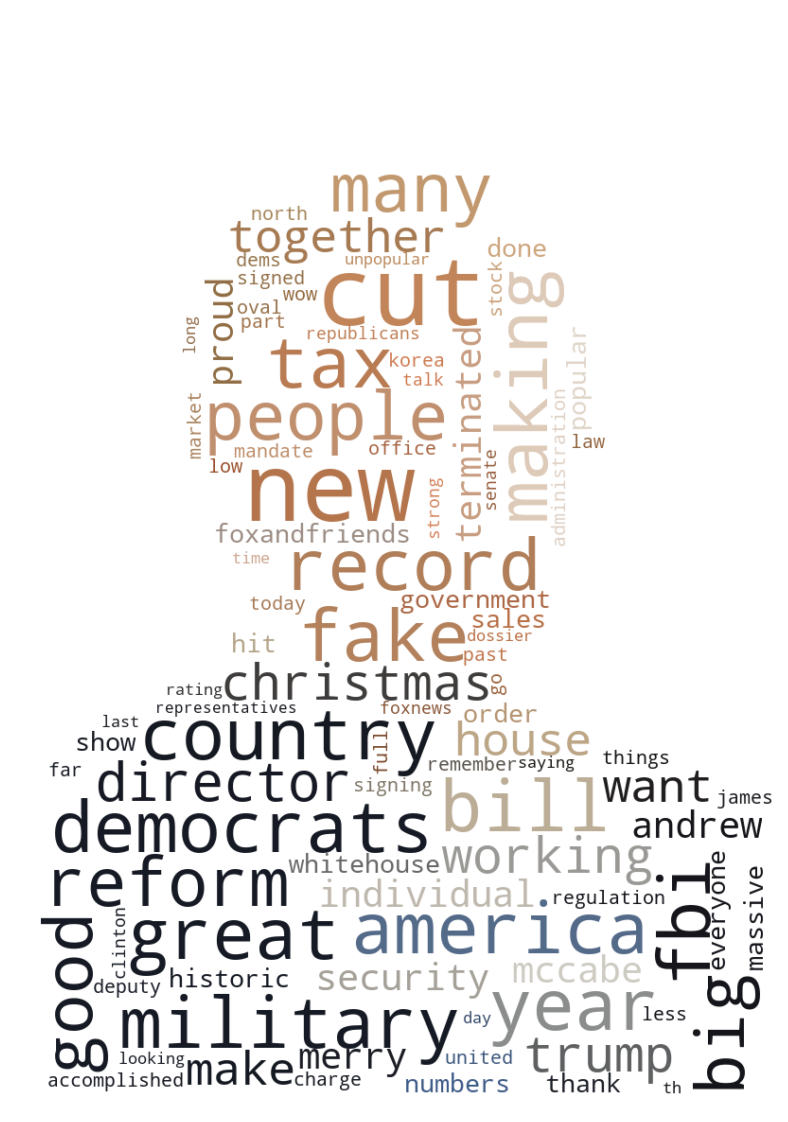

In [63]:
#using a mask
#if you want to use an image, its fun. you can edit in a word document, drag image
#into the document, click on it, and then click on the arrows in header and pick format
#picture, select remove background, workd with that, then click on crop.
#remember to change the color of the background to white, or this won't work --
#it will still color as a square..
text = " ".join([each for each in month1_new])
#flag.fld/image003.png
trump_color = np.array(Image.open("Trumpformatted1.png")) #picture taken off wh page in jan 2018, think its different from the hold one 

#wc = WordCloud(width=400, height=400, background_color="white", max_words=2000, mask=trump_color,
     #          max_font_size=40, random_state=2)
#wc.generate(text)


wc = WordCloud(width=20, height=20, background_color="white", max_words=2000, mask=trump_color,
               max_font_size=100, random_state=42)
wc.generate(text)
#plt.figure( figsize=(10,10) )


# create coloring from image
image_colors = ImageColorGenerator(trump_color)

plt.figure( figsize=(20,20) )
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('Trump_wordclloudJan2018.png')
# iadded some of this dpi from stack overflow
#sit will save as blank if you put this AFTER plt.show
plt.show() #just fyi if you se a numbery thing its since you have show twice
#sometimes number shows with above on and sometimes with off..a mystery! it ALSO
#can cause this not to save using plt.savfig ...!


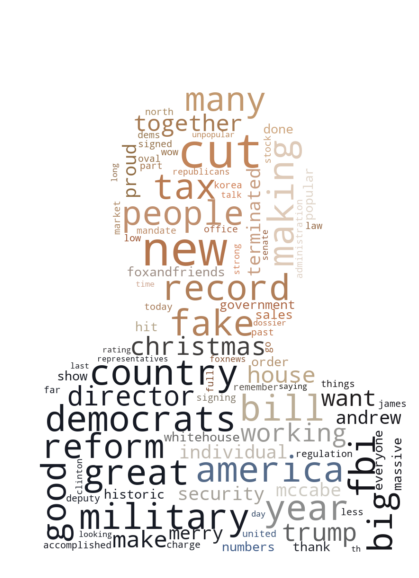

In [65]:
text = " ".join([each for each in month1_new])

trump_color = np.array(Image.open("Trumpformatted1.png")) #t002.png -- his is his original picture! ie 2017 or so

#wc = WordCloud(width=400, height=400, background_color="white", max_words=2000, mask=trump_color,
              # max_font_size=40, random_state=42)
#wc.generate(text)
wc = WordCloud(width=20, height=20, background_color="white", max_words=2000, mask=trump_color,
               max_font_size=100, random_state=42)
wc.generate(text)
plt.figure( figsize=(20,10) )
# Show the Word cloud with colors that are in photo
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
#if the below isn't there you get a numbery thing that is a mystery to me!
plt.show()
plt.savefig('test100.png')

(-0.5, 780.5, 1149.5, -0.5)

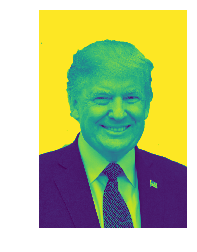

In [61]:
#using a mask
text = " ".join([each for each in month1_new])

trump_color = np.array(Image.open("Trumpformatted1.png"))
#"flag.fld/image002.png" flag image 
wc = WordCloud(background_color="white", max_words=2000, mask=trump_color,
               max_font_size=40, random_state=42)
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(trump_color)

 #the below can be fun if you want to mess with it
    #making it into one channel color -- http://matplotlib.org/users/image_tutorial.html
lum_img = trump_color[:,:,0]
    #get rid of grid on image of trumpy
plt.grid(False)
    #showing the image
plt.imshow(lum_img)
    #luminosity dfault called jet
#plt.imshow(lum_img, cmap="hot",)

imgplot = plt.imshow(lum_img)
    #the below is cool!
#imgplot.set_cmap('nipy_spectral')
plt.axis("off")

#plt.savefig('trump_hotface.png')


In [ ]:
# Genearte Word cloud  -- generating from all words, not most frequent

from scipy.misc import imread
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



#Get the text document and join all the words together

text = " ".join([each for each in  soFar_new])
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#plt.savefig('trump_talk.png')

In [ ]:
#make a bar chart of most common words


# plot the bar graph for top 20 occuring words  for full,pos ,neg dataset 
fig = plt.figure(figsize=(20,25))

fig.show()

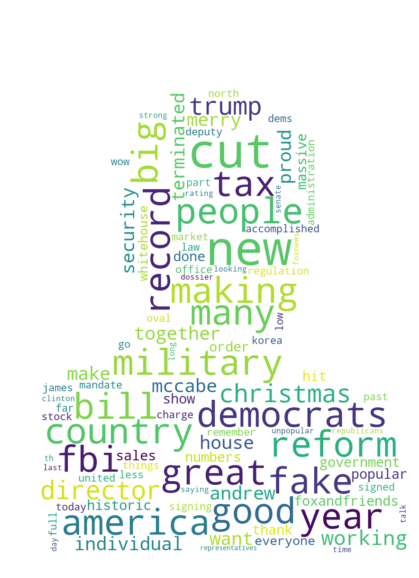

In [62]:

from scipy.misc import imread
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



#using a mask
#if you want to use an image, its fun. you can edit in a word document, drag image
#into the document, click on it, and then click on the arrows in header and pick format
#picture, select remove background, workd with that, then click on crop.
#remember to change the color of the background to white, or this won't work --
#it will still color as a square..
text = " ".join([each for each in month1_new])
#"flag.fld/image002.png"
trump_color = np.array(Image.open("Trumpformatted1.png"))

wc = WordCloud(width=20, height=20, background_color="white", max_words=2000, mask=trump_color,
               max_font_size=100, random_state=42)
wc.generate(text)
plt.figure( figsize=(10,10) )
# Show the Word cloud with colors that aren't in photo
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
#if the below isn't there you get a numbery thing that is a mystery to me!
plt.show()
plt.savefig('test150.jpg')